# Analyses of Project Dolfin DataSet for Saving and Prediction

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
dataset_path = r"C:\DolFIn\transactions dataset.csv"
df = pd.read_csv(dataset_path)

In [3]:
def getSampleData():
    return df

datasetDolFin = getSampleData()

In [4]:
# Checking the shape
print("Number of rows:", datasetDolFin.shape[0])
print("Number of columns:", datasetDolFin.shape[1])

Number of rows: 289
Number of columns: 16


In [5]:
# Checking the first few rows
datasetDolFin.head(10)

,type,id,status,description,amount,account,balance,direction,class,institution,connection,enrich,transactionDate,postDate,subClass,links
0,transaction,4957bcf6-f18f-43d7-94df-71f44a0bcf32,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,d3de1ca1,22109.56,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:07:36,NaN,"{""account"":""https://au-api.basiq.io/users/6a52..."
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b..."
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,29/07/2023,2023-07-29T00:00:00Z,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}"""
5,transaction,08e6f7c9-f359-48f2-b086-a55f468f2f60,posted,TFR From Transaction to CC Acc 13,-9406.0,070c1d68-0ee0-477a-9679-294ea7059939,26367.06,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,28/07/2023,2023-07-28T00:00:00Z,"{\title\"":\""Civic","Professional and Other Interest Group Services\"""
6,transaction,53570fde-c731-4e33-8224-0583650eeaa7,posted,Payroll WFRMS 15439393,17098.0,070c1d68-0ee0-477a-9679-294ea7059939,35773.06,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,28/07/2023,2023-07-28T00:00:00Z,"{\title\"":\""Unknown\""","\""code\"":\""0\""}"""
7,transaction,55dbdd71-9976-43ec-a724-7cf620d279d4,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,18675.06,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,17/07/2023,2023-07-17T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
8,transaction,17b710a5-da3d-42f8-ae31-f9d601f95c6d,posted,MANLY WEST SCHOOL,-1422.2,070c1d68-0ee0-477a-9679-294ea7059939,18474.06,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,16/07/2023,2023-07-16T00:00:00Z,"{\title\"":\""School Education\""","\""code\"":\""802\""}"""
9,transaction,d93fb495-8a7a-4997-8a16-b3581b778471,posted,MANLY WEST SCHOOL,-51.0,070c1d68-0ee0-477a-9679-294ea7059939,19896.26,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,16/07/2023,2023-07-16T00:00:00Z,"{\title\"":\""School Education\""","\""code\"":\""802\""}"""


In [6]:
# Checking data types
print(datasetDolFin.dtypes)

type                object
id                  object
status              object
description         object
amount             float64
account             object
balance            float64
direction           object
class               object
institution         object
connection          object
enrich             float64
transactionDate     object
postDate            object
subClass            object
links               object
dtype: object


In [7]:
# Checking for missing values
missing_values = datasetDolFin.isnull().sum()
print(missing_values)

# Removing duplicate rows
datasetDolFin.drop_duplicates(inplace=True)


type                 0
id                   0
status               0
description          0
amount               0
account              0
balance              0
direction            0
class                0
institution          0
connection           0
enrich             289
transactionDate      0
postDate             0
subClass            53
links                0
dtype: int64


In [8]:
# Filter required columns
selected_data = datasetDolFin[['amount', 'balance', 'class', 'transactionDate']]

In [9]:
# Basic Summary Statistics
print(selected_data.describe())

             amount       balance
count    285.000000    285.000000
mean      78.682105   8263.404386
std     5170.323645   6168.945784
min    -9406.000000  -1159.840000
25%     -500.000000   4710.660000
50%     -100.000000   6444.490000
75%       -1.310000  10224.840000
max    17098.000000  35773.060000


# Distribution Analysis of Transaction Amount and Balance:
Understand the spread, skewness, and central tendency of amount and balance.

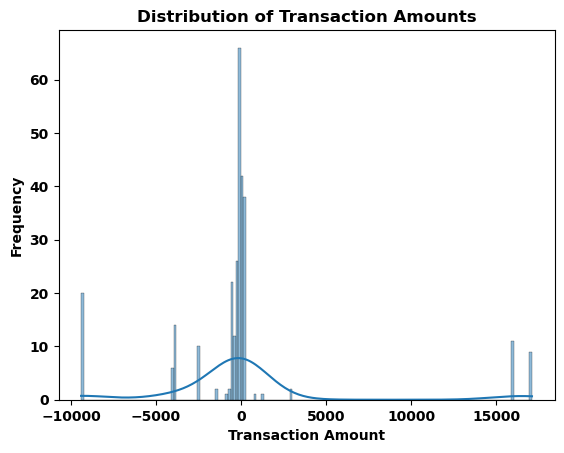

In [10]:
# Histogram for Transaction Amount
sns.histplot(selected_data['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

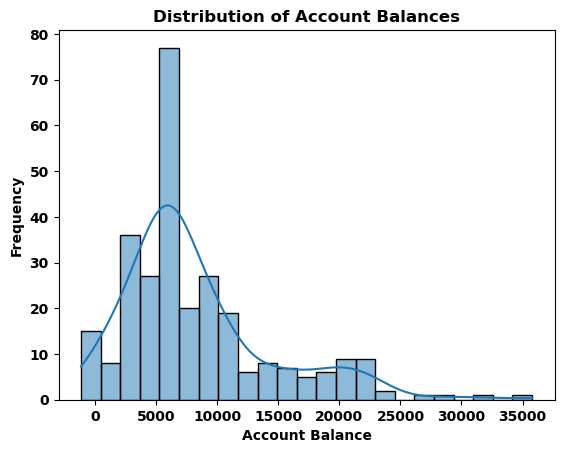

In [11]:
# Histogram for Account Balance
sns.histplot(selected_data['balance'], kde=True)
plt.title('Distribution of Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

# Analysis of Transaction Classes:
Gain insights into the distribution and significance of different transaction classes.

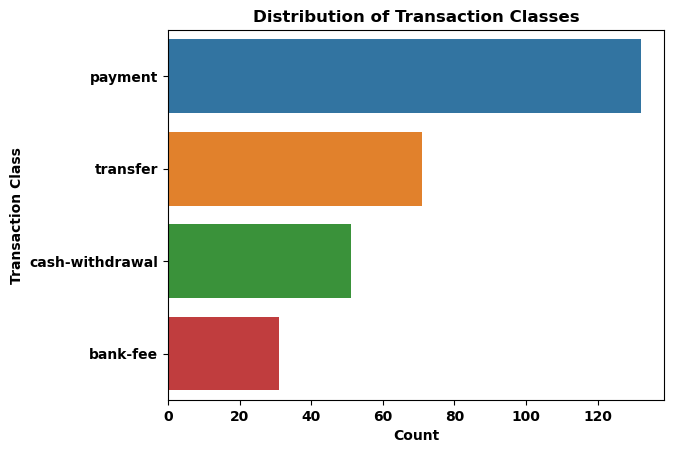

In [12]:
# Count of each transaction class
sns.countplot(data=selected_data, y='class', order=selected_data['class'].value_counts().index)
plt.title('Distribution of Transaction Classes')
plt.xlabel('Count')
plt.ylabel('Transaction Class')
plt.show()

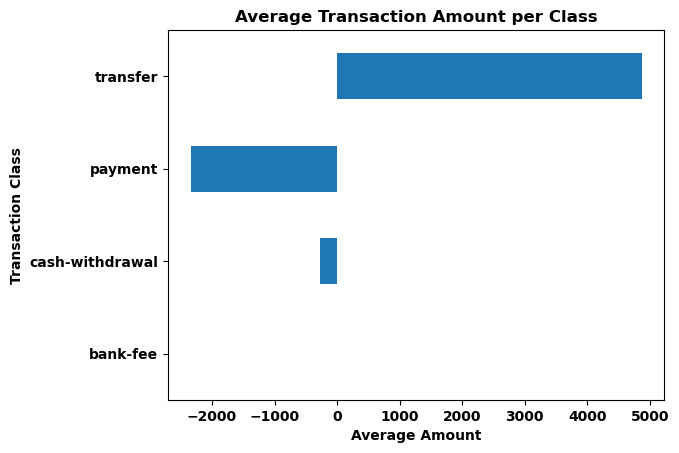

In [13]:
# Average transaction amount per class
avg_amount_per_class = selected_data.groupby('class')['amount'].mean()
avg_amount_per_class.plot(kind='barh')
plt.title('Average Transaction Amount per Class')
plt.xlabel('Average Amount')
plt.ylabel('Transaction Class')
plt.show()

# Time Series Analysis:
Understand trends and patterns related to amount and balance over time.

C:\Users\adminguest.RUT-NORT-NB111\AppData\Local\Temp\ipykernel_8104\2803147309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['transactionDate'] = pd.to_datetime(selected_data['transactionDate'], format='%d/%m/%Y')


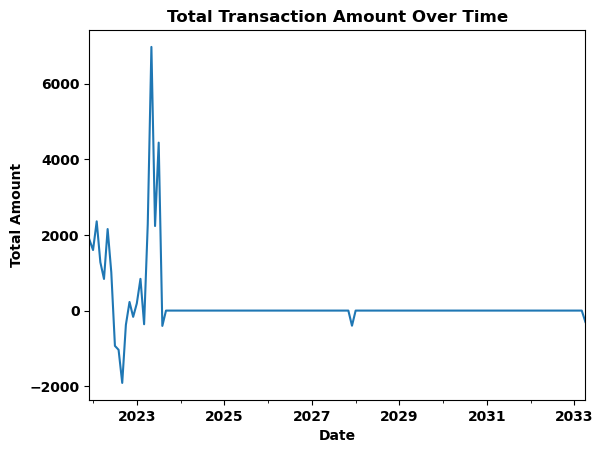

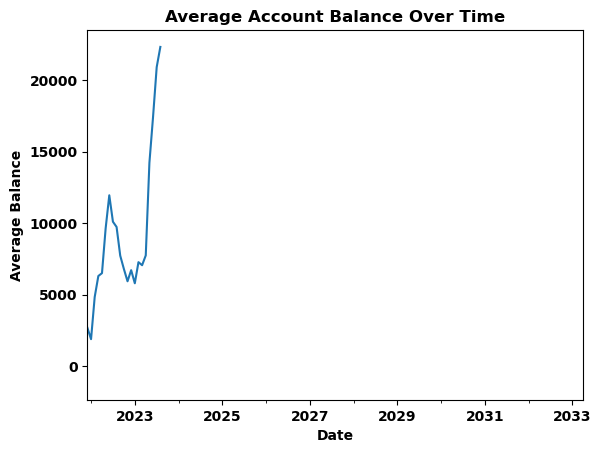

In [14]:
selected_data['transactionDate'] = pd.to_datetime(selected_data['transactionDate'], format='%d/%m/%Y')

# Aggregate Amount over time
selected_data.set_index('transactionDate').resample('M')['amount'].sum().plot()
plt.title('Total Transaction Amount Over Time')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.show()

# Aggregate Balance over time
selected_data.set_index('transactionDate').resample('M')['balance'].mean().plot()
plt.title('Average Account Balance Over Time')
plt.ylabel('Average Balance')
plt.xlabel('Date')
plt.show()


# Correlation Analysis:
Explore the relationship between transaction amounts and account balance.

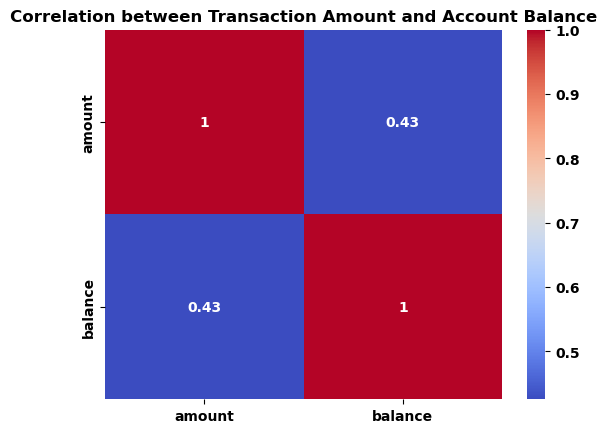

In [15]:
correlation = selected_data[['amount', 'balance']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Transaction Amount and Account Balance')
plt.show()


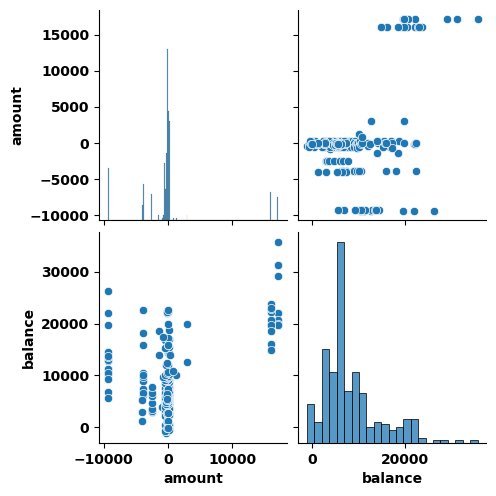

In [16]:
sns.pairplot(selected_data[['amount', 'balance']])
plt.show()


C:\Users\adminguest.RUT-NORT-NB111\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adminguest.RUT-NORT-NB111\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adminguest.RUT-NORT-NB111\AppData\Local\Temp\ipykernel_8104\224070488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cluster'] = kmeans.fit_predict(selected_data[[

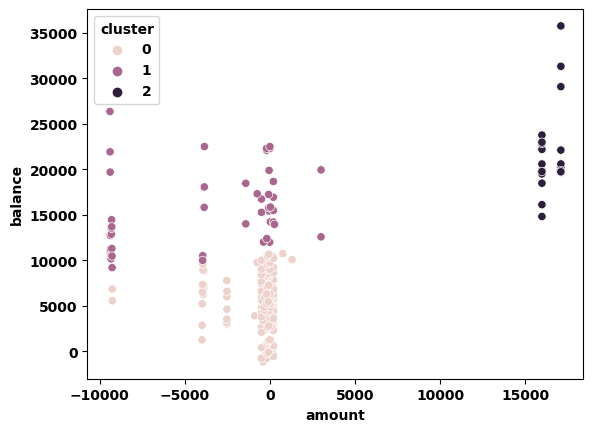

In [18]:
from sklearn.cluster import KMeans


# Apply KMeans
kmeans = KMeans(n_clusters=3)
selected_data['cluster'] = kmeans.fit_predict(selected_data[['amount', 'balance']])

# Plot clusters
sns.scatterplot(x='amount', y='balance', hue='cluster', data=selected_data)
plt.show()



In [20]:
# Calculate Pearson's correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(selected_data['amount'], selected_data['balance'])

print("Pearson's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is evidence to suggest a significant correlation between transaction amount and account balance.")
else:
    print("There is no evidence to suggest a significant correlation between transaction amount and account balance.")


Pearson's correlation coefficient: 0.4257137355400044
p-value: 5.6514621894495563e-14
There is evidence to suggest a significant correlation between transaction amount and account balance.


# Word Cloud:

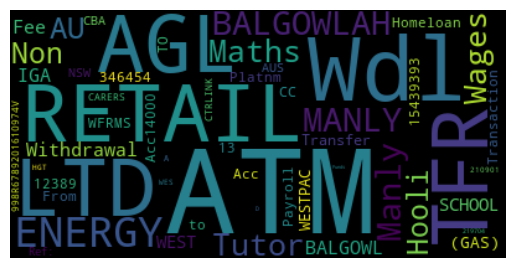

In [21]:
from wordcloud import WordCloud
from collections import Counter

# Concatenate all descriptions
all_descriptions = " ".join(datasetDolFin['description'])

# Calculate word frequencies
word_freq = Counter(all_descriptions.split())

# Generate and display the word cloud
wordcloud = WordCloud().generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
